### Задание 1 - по тетрадке sem01_autograd.

1. Добавить Bias и посчитать для них градиенты.
2. Сравнить градиенты с тем, как считает PyTorch AutoGrad.

In [28]:
import numpy as np
import torch

In [29]:
batch_size = 64
input_size = 3
hidden_size = 2
output_size = 1

In [30]:
device = torch.device('cpu')
dtype = torch.float

In [31]:
# Create random input and output data
x = torch.randn(batch_size, input_size, device=device, dtype=dtype)
y = torch.randn(batch_size, output_size, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype)
w2 = torch.randn(hidden_size, output_size, device=device, dtype=dtype)

b1 = torch.randn(hidden_size, device=device, dtype=dtype)  # bias для 1 слоя
b2 = torch.randn(output_size, device=device, dtype=dtype)  # bias для output слоя 

In [32]:
learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    #TODO
    h_1 = x.mm(w1) + b1 # hidden layer 1 с Bias
    h_relu = h_1.clamp(min=0)  # relu
    out = h_relu.mm(w2) + b2 # это наш y_pred выходной слой с Bias
    
    # Compute and print loss
    loss = (out - y).pow(2).sum().item() # это MSE 
    
    # Backward pass: здесь надо посчитать градиент
    dloss_out = 2 * (out - y) # производная функции потерь по выходам сети

# как было раньше без Bias
    '''  grad_w2 = h_relu.t().mm(dloss_out)  # производная градиент по w2

    grad_hrelu = dloss_out.mm(w2.t()) # градиент по релу
    grad_hrelu[h_1 < 0] = 0
    grad_w1 = x.t().mm(grad_hrelu) 
    
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2'''

    # градиенты для w2 и b2
    grad_w2 = h_relu.t().mm(dloss_out)  # градиент по весам w2
    grad_b2 = dloss_out.sum(dim=0) # сумма градиентов для всех выходов, dim=0 для одинаковой размерности 

    # здесь проход назад через релу
    grad_hrelu = dloss_out.mm(w2.t())  #  градиент функции потерь относительно активаций после применения функции ReLU на скрытом слое
    grad_hrelu[h_1 < 0] = 0  # производная релу

    # теперь градиенты для w1 и b1
    grad_w1 = x.t().mm(grad_hrelu)  
    grad_b1 = grad_hrelu.sum(dim=0)  

    # обновление весов
    w1 -= learning_rate * grad_w1
    b1 -= learning_rate * grad_b1
    w2 -= learning_rate * grad_w2
    b2 -= learning_rate * grad_b2



  
    if t % 100 == 99:
        print(f'Loss on iteration {t} = {loss}')
    

Loss on iteration 99 = 61.2994270324707
Loss on iteration 199 = 60.914085388183594
Loss on iteration 299 = 60.55101776123047
Loss on iteration 399 = 60.20832443237305
Loss on iteration 499 = 59.884315490722656


In [33]:
print(f'градиенты для w2:\n{grad_w2} и b2: {grad_b2}\nградиенты для w1:\n{grad_w1} и b1: {grad_b1}\nградиент функции потерь по активациям скрытого слоя после применения ReLU:\n{grad_hrelu}')

градиенты для w2:
tensor([[ -2.6190],
        [-53.0791]]) и b2: tensor([-12.0915])
градиенты для w1:
tensor([[  0.0718,   0.9534],
        [  1.3842, -10.1292],
        [ -0.1612,   3.6442]]) и b1: tensor([-0.1946,  7.8912])
градиент функции потерь по активациям скрытого слоя после применения ReLU:
tensor([[-1.2812e-01,  1.6509e+00],
        [ 2.1122e-02,  0.0000e+00],
        [-8.7856e-02,  0.0000e+00],
        [-4.8510e-02,  6.2508e-01],
        [ 0.0000e+00,  2.2884e-01],
        [-4.7401e-02,  6.1079e-01],
        [ 1.1606e-01,  0.0000e+00],
        [ 2.5673e-02,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [-4.5428e-02,  5.8536e-01],
        [ 4.5904e-02,  0.0000e+00],
        [-6.9304e-03,  0.0000e+00],
        [-6.0356e-02,  7.7772e-01],
        [-1.3343e-02,  0.0000e+00],
        [ 0.0000e+00,  3.1449e-01],
        [ 1.6514e-02,  0.0000e+00],
        [-5.4046e-03,  6.9642e-02],
        [-3.1187e-02,  4.0187e-01],
        [-6.7244e-02,  0.0000e+00],
        [-6.990

In [35]:
# посмотрим теперь что с autograd

# возьмём прошлые данные
xauto = x 
yauto = y 

w1auto = w1.requires_grad_() # это чтобы добавить requires grad в уже существующие
w2auto = w2.requires_grad_()

b1auto = b1.requires_grad_() # bias для 1 слоя
b2auto = b2.requires_grad_()  # bias для output слоя 

In [36]:
import torch.optim as optim

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
optimizer = torch.optim.Adam([w1auto, b1auto, w2auto, b2auto], lr=learning_rate)

for t in range(500):
    optimizer.zero_grad() # обнуление градиентов

    y_pred = (xauto.mm(w1auto) + b1auto).clamp(min=0).mm(w2auto) + b2auto

    loss = loss_fn(y_pred, yauto)
    if t % 100 == 99:
        print(t, loss.item())

    loss.backward()

    optimizer.step()

99 59.87199783325195
199 59.86279296875
299 59.85362243652344
399 59.84455108642578
499 59.835609436035156


In [37]:
print(optimizer.param_groups)

[{'params': [tensor([[ 0.6816,  0.0208],
        [ 0.0299, -1.8112],
        [-0.9564,  0.6215]], requires_grad=True), tensor([ 1.5968, -0.4563], requires_grad=True), tensor([[ 0.0254],
        [-0.3205]], requires_grad=True), tensor([-0.2798], requires_grad=True)], 'lr': 1e-06, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': None}]


In [40]:
# без оптимизатора

learning_rate = 1e-6
for t in range(500):
    out = (x.mm(w1auto) + b1auto).clamp(min=0).mm(w2auto) + b2auto

    loss = (out - yauto).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Теперь подсчет градиентов для весов происходит при вызове backward
    loss.backward()

    # Обновляем значение весов, но укзаываем, чтобы PyTorch не считал эту операцию,
    # которая бы участвовала бы при подсчете градиентов в chain rule 
    with torch.no_grad():
        w1auto -= learning_rate * w1auto.grad
        w2auto -= learning_rate * w2auto.grad
        b1auto -= learning_rate * grad_b1
        b2auto -= learning_rate * grad_b2

        # Теперь обнуляем значение градиентов, чтобы на следующем шаге
        # они не учитывались при подсчете новых градиентов,
        # иначе произойдет суммирвоание старых и новых градиентов
        w1auto.grad.zero_()
        w2auto.grad.zero_()
        b1auto.grad.zero_()
        b2auto.grad.zero_()

99 59.531837463378906
199 59.242671966552734
299 58.967262268066406
399 58.70476150512695
499 58.45435333251953


### Задание 2. 

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка, и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
df = pd.read_csv('data.csv',index_col=0)

In [48]:
df.head(10)

x1        x2  y
0 -4.626272 -6.658988  0
1 -7.789640  0.262519  0
2 -8.739678  1.537758  0
3 -2.546441 -7.705224  0
4 -2.751506 -7.940187  0
5  0.303440  5.969639  0
6 -5.920224  1.339210  1
7 -7.555594  0.733846  1
8  5.995393 -4.607815  0
9  1.465613  4.338939  1

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   y       10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 312.5 KB


In [47]:
df.describe()

x1            x2             y
count  10000.000000  10000.000000  10000.000000
mean      -0.029488     -0.098799      0.509700
std        4.981907      5.022414      0.499931
min       -9.988732     -9.972095      0.000000
25%       -4.062951     -4.170403      0.000000
50%       -0.063085     -0.097836      1.000000
75%        4.016095      3.880448      1.000000
max        9.985560      9.982304      1.000000

Как и в любой задаче машинного обучения, для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


<Axes: xlabel='x1', ylabel='x2'>

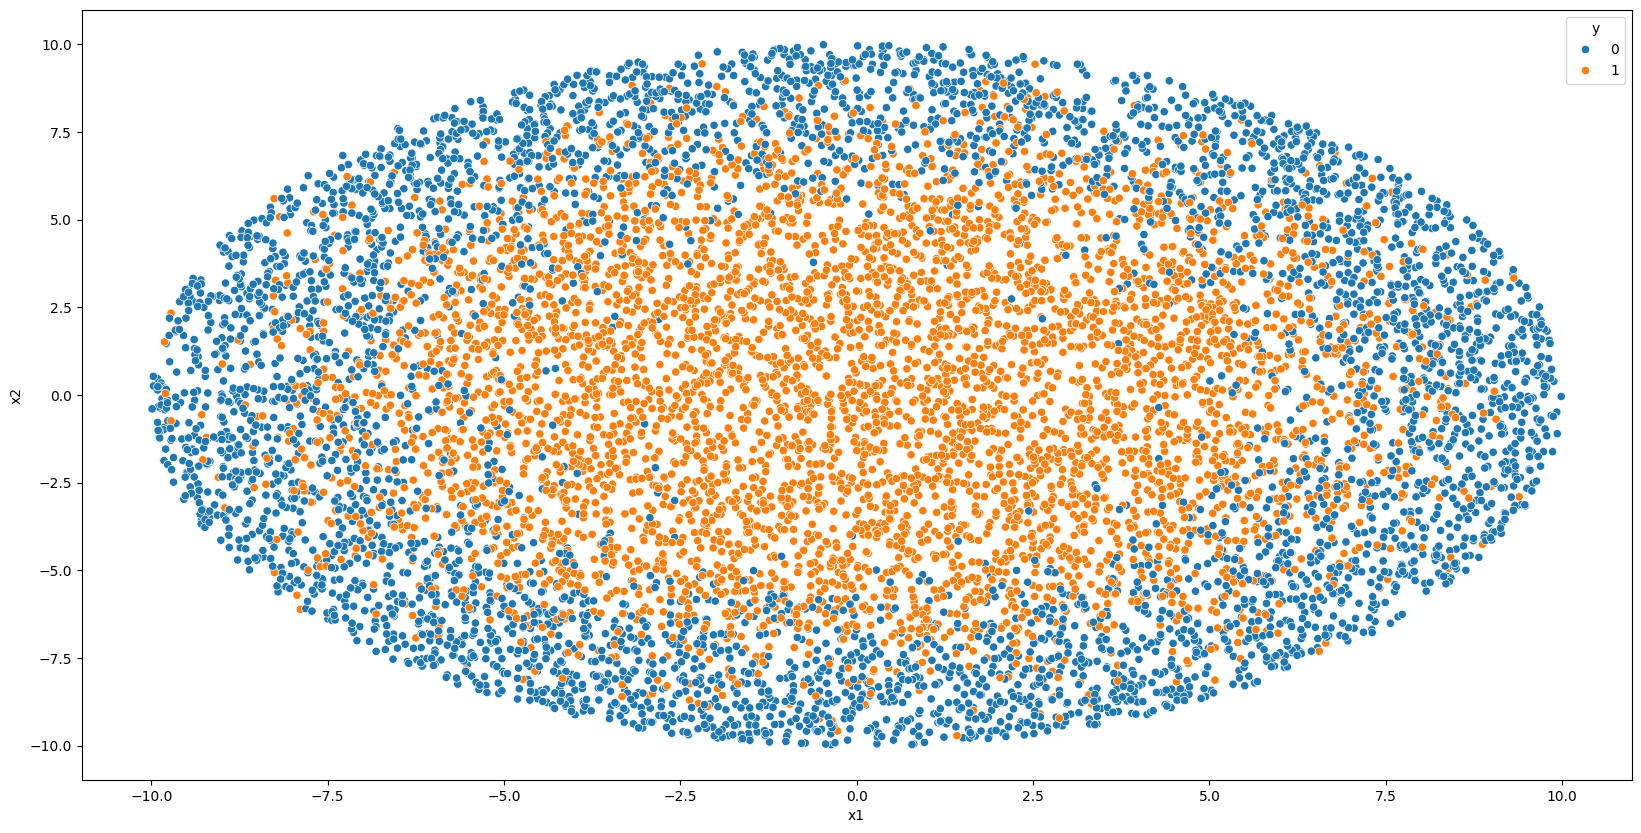

In [44]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data=df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

* 1. Наверное, нет. А бывают ли идеальные модели?
* 2. Сколько выбросов, какие значения (ну видно, что разброс большой в обоих классах)
* 3. Алгоритмы классификации (логистическая регрессия, K-neighbours, random forest, decision tree classifier, наивный байес)

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [49]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трейн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size=0.33)

In [58]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train) 

predict_logit =  model.predict(X_test)
predict_log_proba = model.predict_proba(X_test)

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

Точность нашей модели 0.5869696969696969


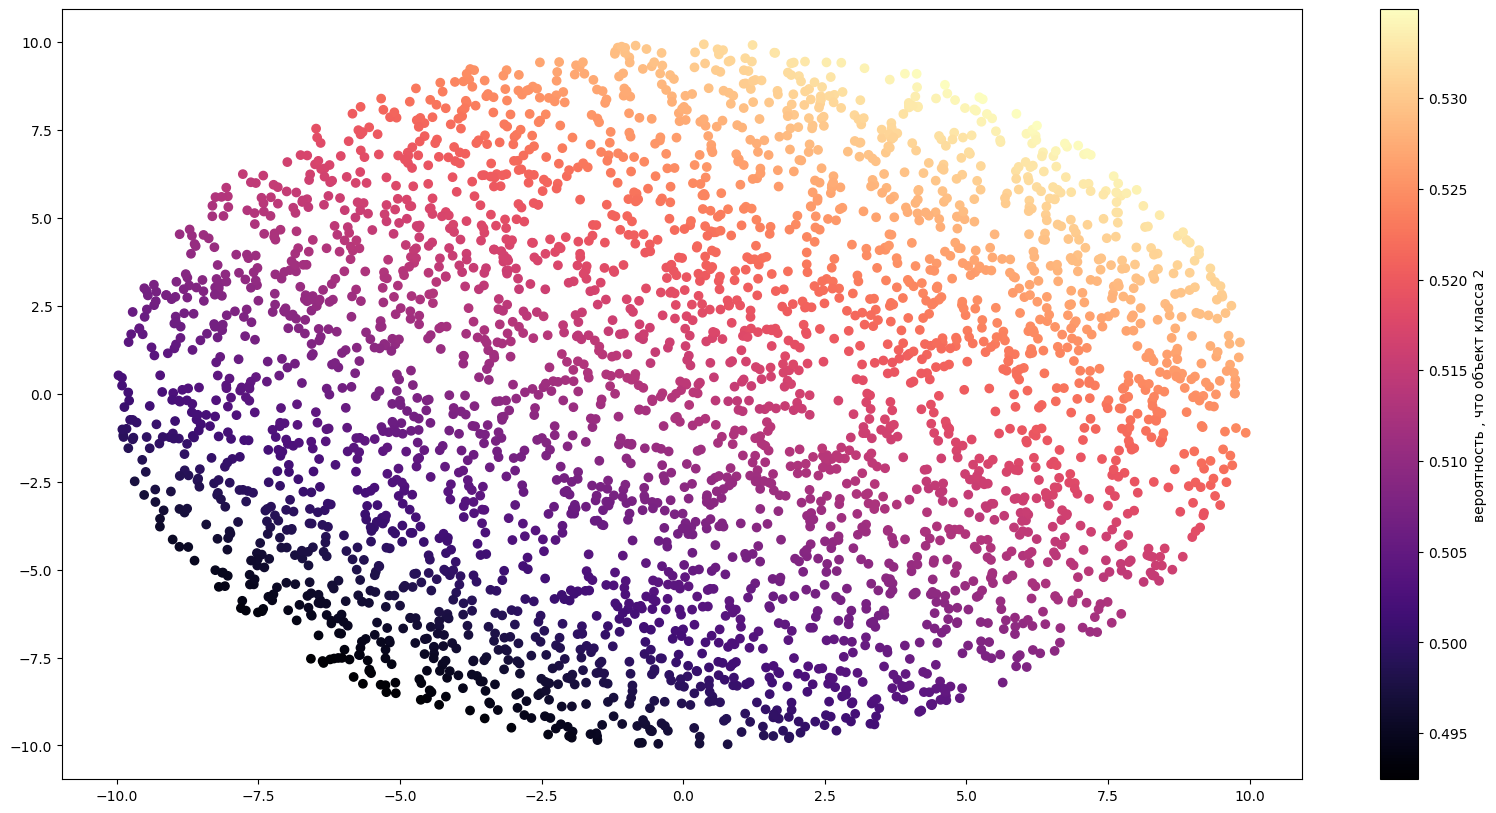

In [57]:
proba_class_2 = predict_log_proba[:, 1] # ValueError: 'c' argument has 6600 elements, which is inconsistent with 'x' and 'y' with size 3300.

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=proba_class_2, cmap='magma')
plt.colorbar(label='вероятность , что объект класса 2')
plt.show()

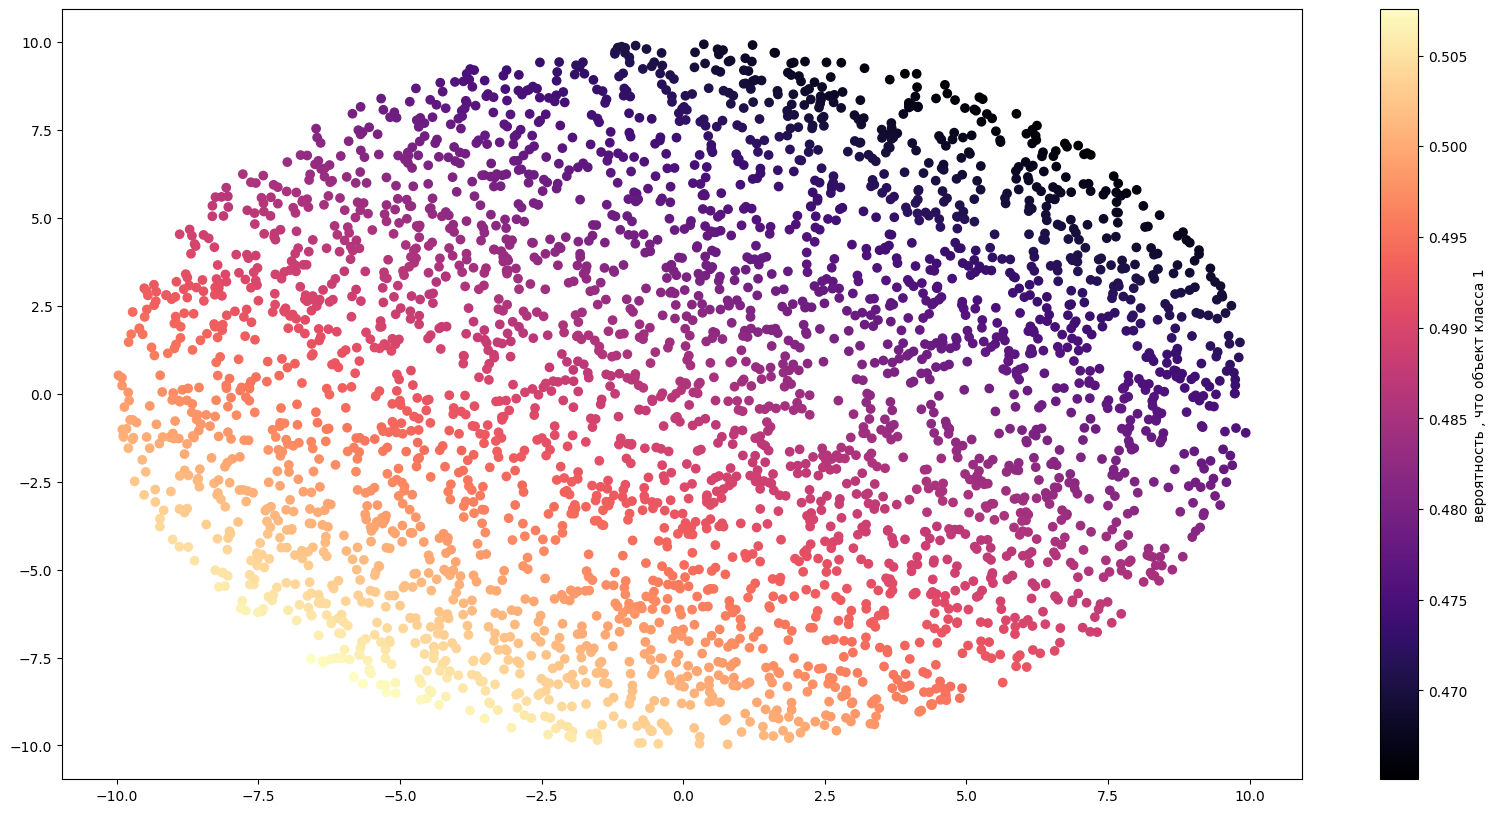

In [56]:
proba_class_1 = predict_log_proba[:, 0] 

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=proba_class_1, cmap='magma')
plt.colorbar(label='вероятность , что объект класса 1')
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

In [74]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

Точность нашей модели 0.8290909090909091


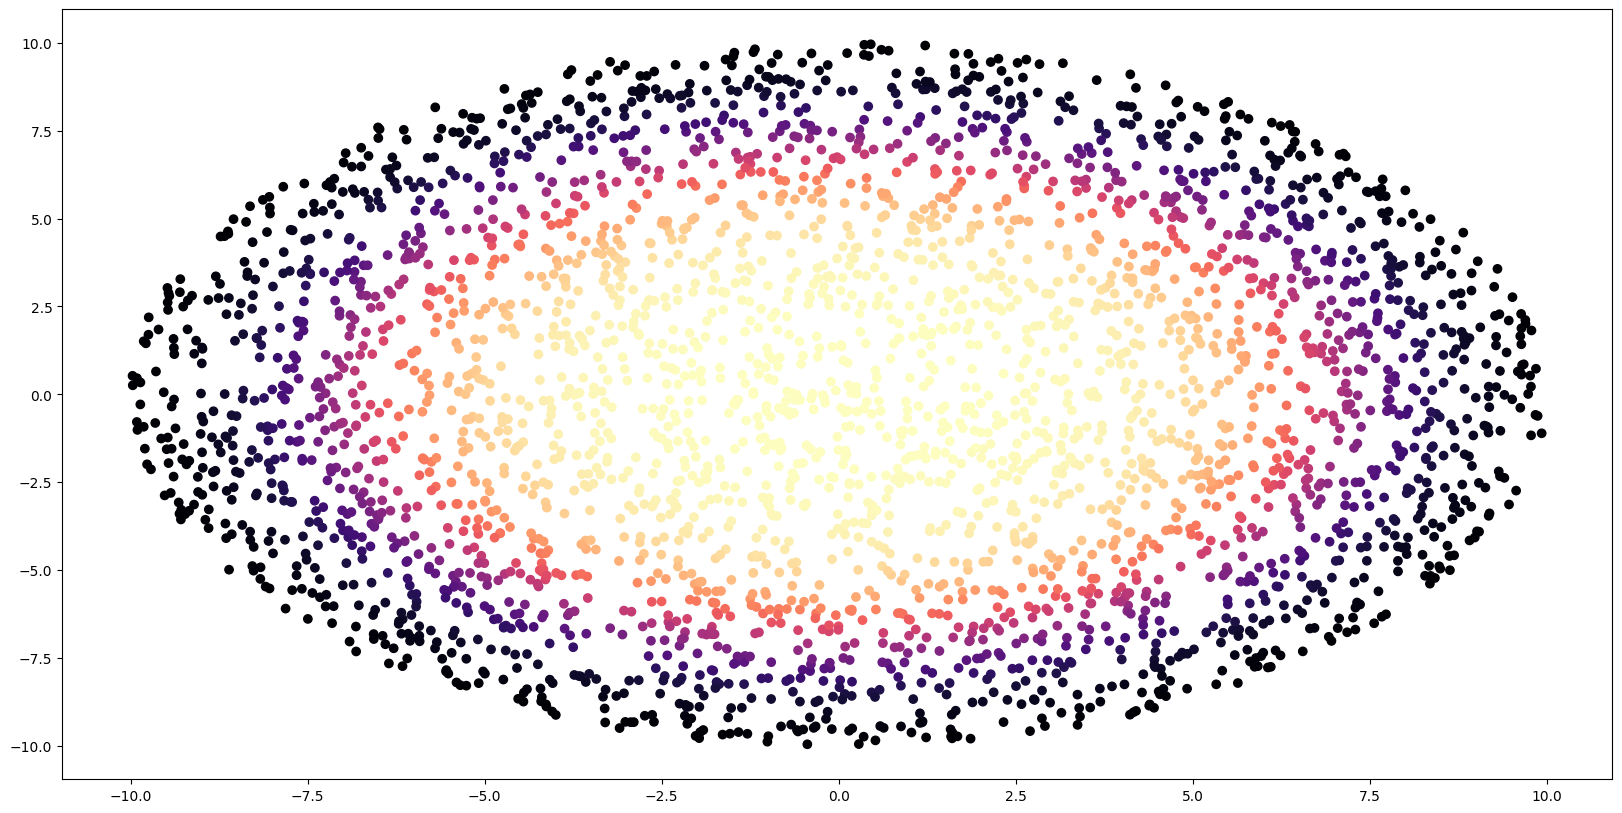

In [77]:
#########################################
# ваш код для фичей и новой модели


# здесь я решила посчитать расстояние до центра, потому что данные расположены почти по кругу
df_new['new_feature_1'] = (df['x1']**2 + df['x2']**2)**0.5 # d = √((x2 - x1)2 + (y2 - y1)2) формулу взяла из интернета


X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size=0.33)

model = LogisticRegression(random_state=42)
model.fit(X_train_new, y_train_new)
predict_logit =  model.predict(X_test_new)
predict_log_proba = model.predict_proba(X_test_new)[:, 1]

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit, y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c=predict_log_proba, cmap='magma')
plt.show()

# ОООО

In [78]:
df_new.head()

x1        x2  y  new_feature_1
0 -4.626272 -6.658988  0       8.108299
1 -7.789640  0.262519  0       7.794062
2 -8.739678  1.537758  0       8.873932
3 -2.546441 -7.705224  0       8.115100
4 -2.751506 -7.940187  0       8.403413

Переходим к следующему классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

Точность нашей модели 0.8236363636363636


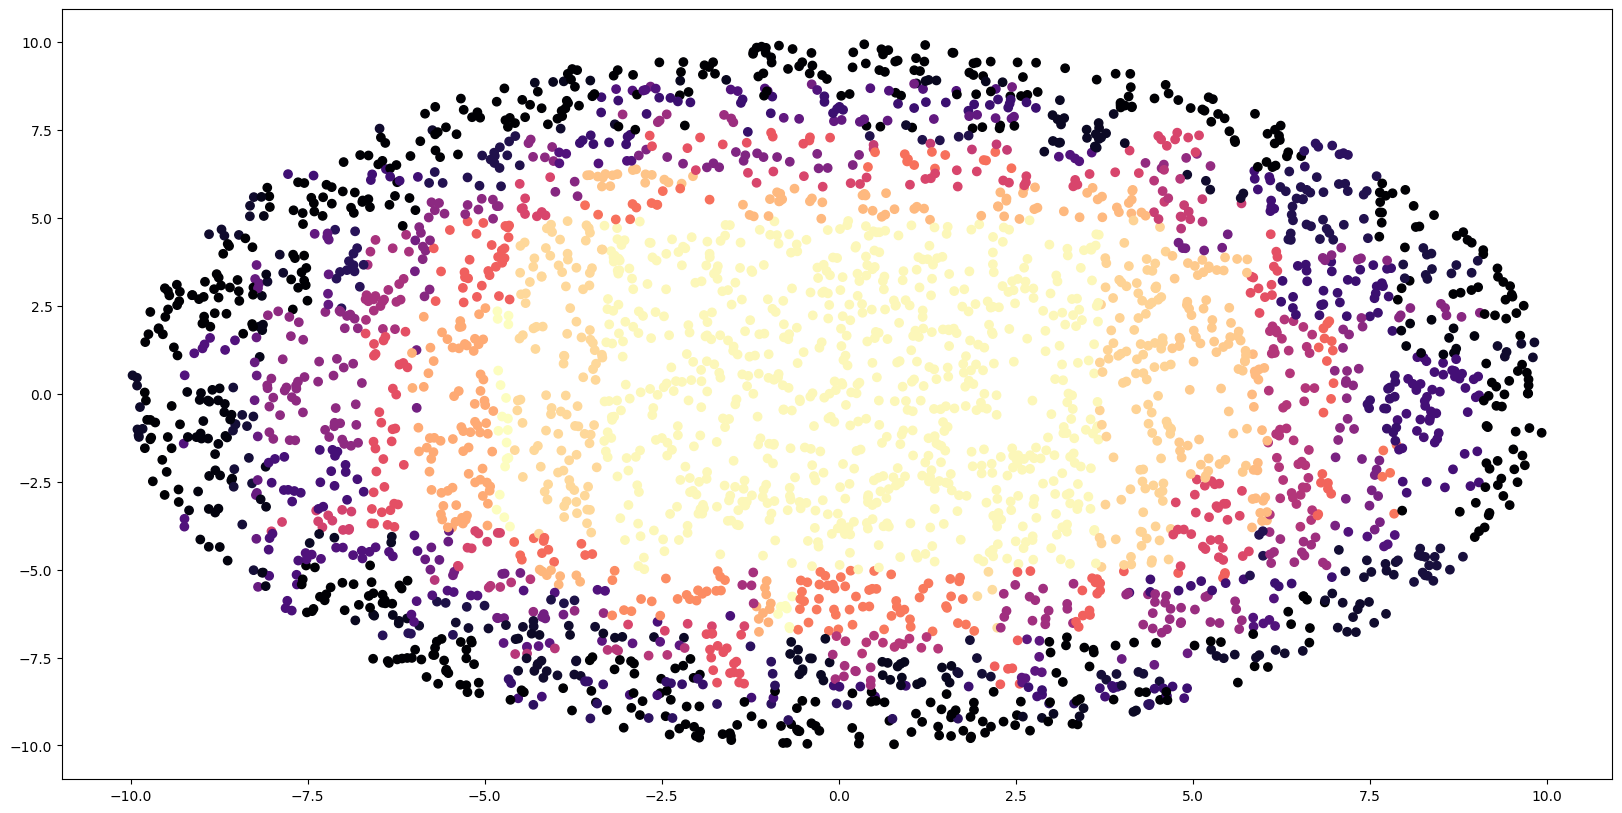

In [90]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# у деревьев есть листья! нужно зафиксировать количество листьев, чтобы модель не переобучилась! и ещё глубину
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=12, random_state=42)
dt.fit(X_train, y_train)

predict_tree = dt.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = dt.predict_proba(X_test)[:, 1]

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_tree_proba, cmap='magma')
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Точность нашей модели 0.8357575757575758


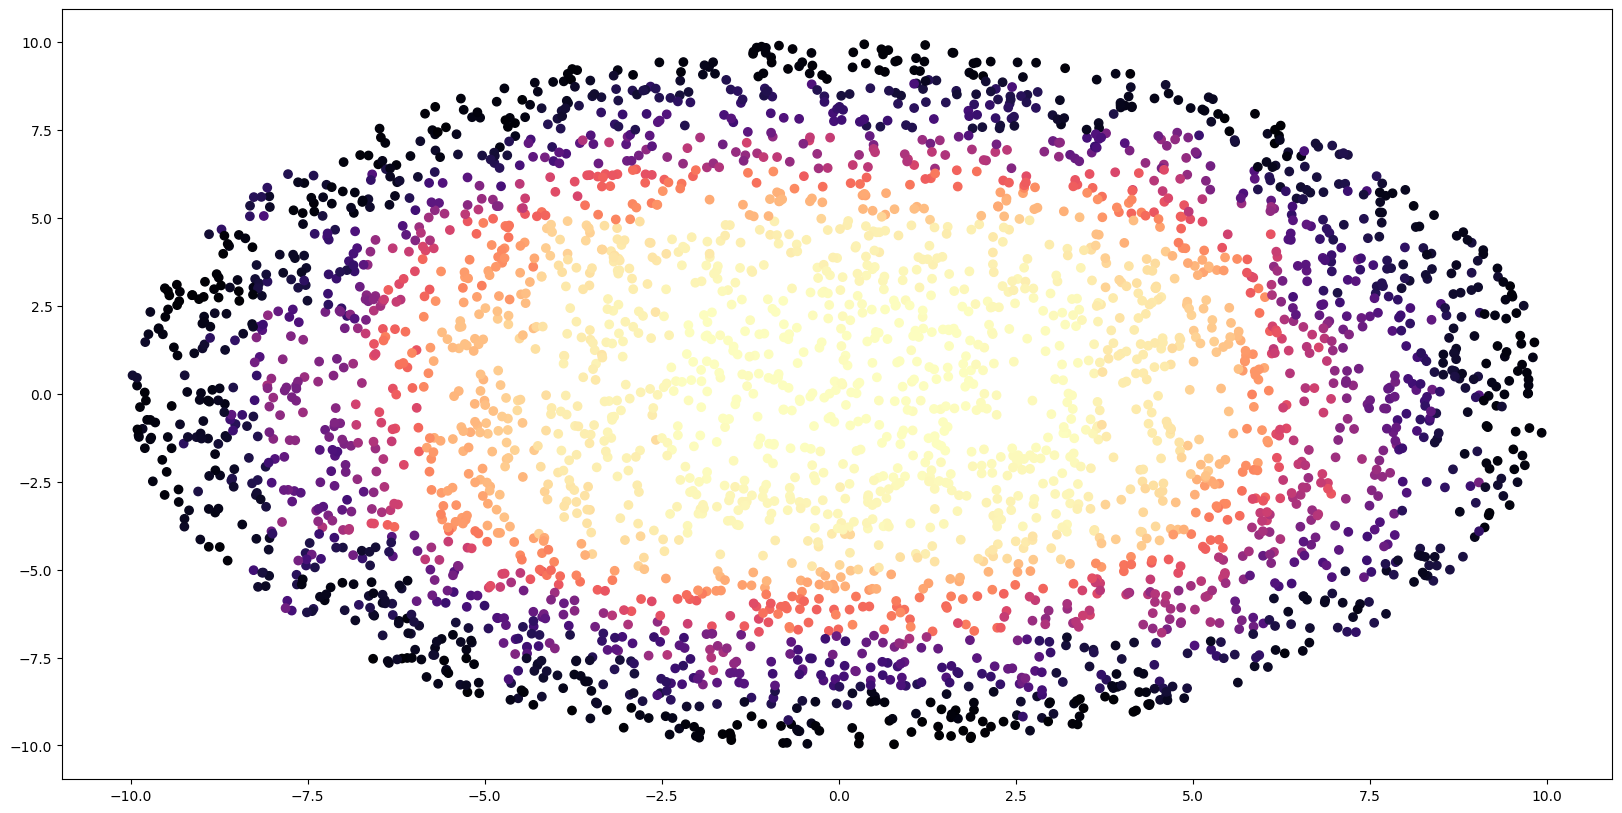

In [103]:
from sklearn.ensemble import RandomForestClassifier

#########################################

model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=3, min_samples_leaf=2, random_state=42)
model.fit(X_train, y_train)

predict_forest = predict_forest = model.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = model.predict_proba(X_test)[:, 1] 

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_forest_proba, cmap='magma')
plt.show()

# вроде помогло чуть-чуть
# обычно ансамбли дают хорошие результаты, когда есть нелинейные зависимости, много признаков..

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. 

In [137]:
import torch
import torch.nn.functional as F
from torch import nn
import torch.optim as optim
import torch.utils.data as data_utils
from torchmetrics import Accuracy

In [162]:
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size=0.33)

In [163]:
def create_data_loader(X_train, y_train, X_test, y_test):
    train_tensor = data_utils.TensorDataset(torch.tensor(X_train.astype(np.float32)), torch.tensor(y_train))
    train_loader = data_utils.DataLoader(dataset=train_tensor,
                                         batch_size=64,
                                         shuffle=True)

    test_tensor = data_utils.TensorDataset(torch.tensor(X_test.astype(np.float32)), torch.tensor(y_test))
    test_loader = data_utils.DataLoader(dataset=test_tensor,
                                        batch_size=64,
                                        shuffle=False)
    return train_loader, test_loader

train_loader, test_loader = create_data_loader(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()) 

In [164]:
INPUT_SIZE = 2
HIDDEN_SIZE = 5
OUTPUT_SIZE = 1
LEARNING_RATE = 1e-6
EPOCHS = 100

In [165]:
def mymodel():
    model = nn.Sequential(
            nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE),
            nn.ReLU(),
            nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE),
            nn.Sigmoid())

    return model

In [166]:
model = mymodel()

In [167]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
  (3): Sigmoid()
)


In [168]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[ 0.5156,  0.6638],
        [-0.5474,  0.3600],
        [ 0.2512, -0.3492],
        [ 0.3194, -0.5728],
        [-0.5850, -0.5414]], requires_grad=True)
Parameter containing:
tensor([-0.1356,  0.1539,  0.5978,  0.6310,  0.4401], requires_grad=True)
Parameter containing:
tensor([[ 0.0395,  0.0776,  0.4297, -0.0422,  0.1412]], requires_grad=True)
Parameter containing:
tensor([-0.2467], requires_grad=True)


In [169]:
criterion = nn.BCELoss() 
accuracy = Accuracy(task='multiclass', num_classes=2)

optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [179]:
# TRAIN LOOP

train_loss_values = []
train_accuracy_values = []
valid_loss_values = []
valid_accuracy = []

def run_train():
    step = 0
    for epoch in range(EPOCHS):
        running_loss = []
        running_acc = []
        for features, label in train_loader:
            # Reset gradients

            output = model(features)
            # Calculate error and backpropagate
            label = label.unsqueeze(1) # ValueError: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
            label = label.float()  # RuntimeError: Found dtype Long but expected Float
            loss = criterion(output, label)
            loss.backward()
            acc = accuracy(output, label).item()

            # Update weights with gradients
            optimizer.step()
            optimizer.zero_grad()

            running_loss.append(loss.item())
            running_acc.append(acc)

            step += 1

        train_loss_values.append(np.mean(running_loss))
        train_accuracy_values.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print(f'EPOCH {epoch}: train_loss: {train_loss_values[-1]}')# train_accuracy_values[-1]))


        # Run validation
        running_loss = []
        running_acc = []
        for features, label in test_loader:
            output = model(features)
            # Calculate error and backpropagate
            label = label.unsqueeze(1)
            label = label.float()
            loss = criterion(output, label)
            acc = accuracy(output, label).item()

            running_loss.append(loss.item())
            running_acc.append(acc)

        valid_loss_values.append(np.mean(running_loss))
        valid_accuracy.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print(f'EPOCH {epoch}: valid_loss: {valid_loss_values[-1]}') # valid_accuracy: {valid_accuracy[-1]}')

    return train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy

In [180]:
train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy = run_train()

EPOCH 0: train_loss: 0.8123340345564343
EPOCH 0: valid_loss: 0.8149982106227142
EPOCH 20: train_loss: 0.8076087361290342
EPOCH 20: valid_loss: 0.8099877180961462
EPOCH 40: train_loss: 0.8026404868988763
EPOCH 40: valid_loss: 0.8051060071358314
EPOCH 60: train_loss: 0.7984846904164269
EPOCH 60: valid_loss: 0.800360694527626
EPOCH 80: train_loss: 0.7940359161013648
EPOCH 80: valid_loss: 0.7957554092774024


In [ ]:
# your code here

In [181]:
with torch.no_grad():
    test_scores = model(torch.tensor(X_test.to_numpy().astype(np.float32)))

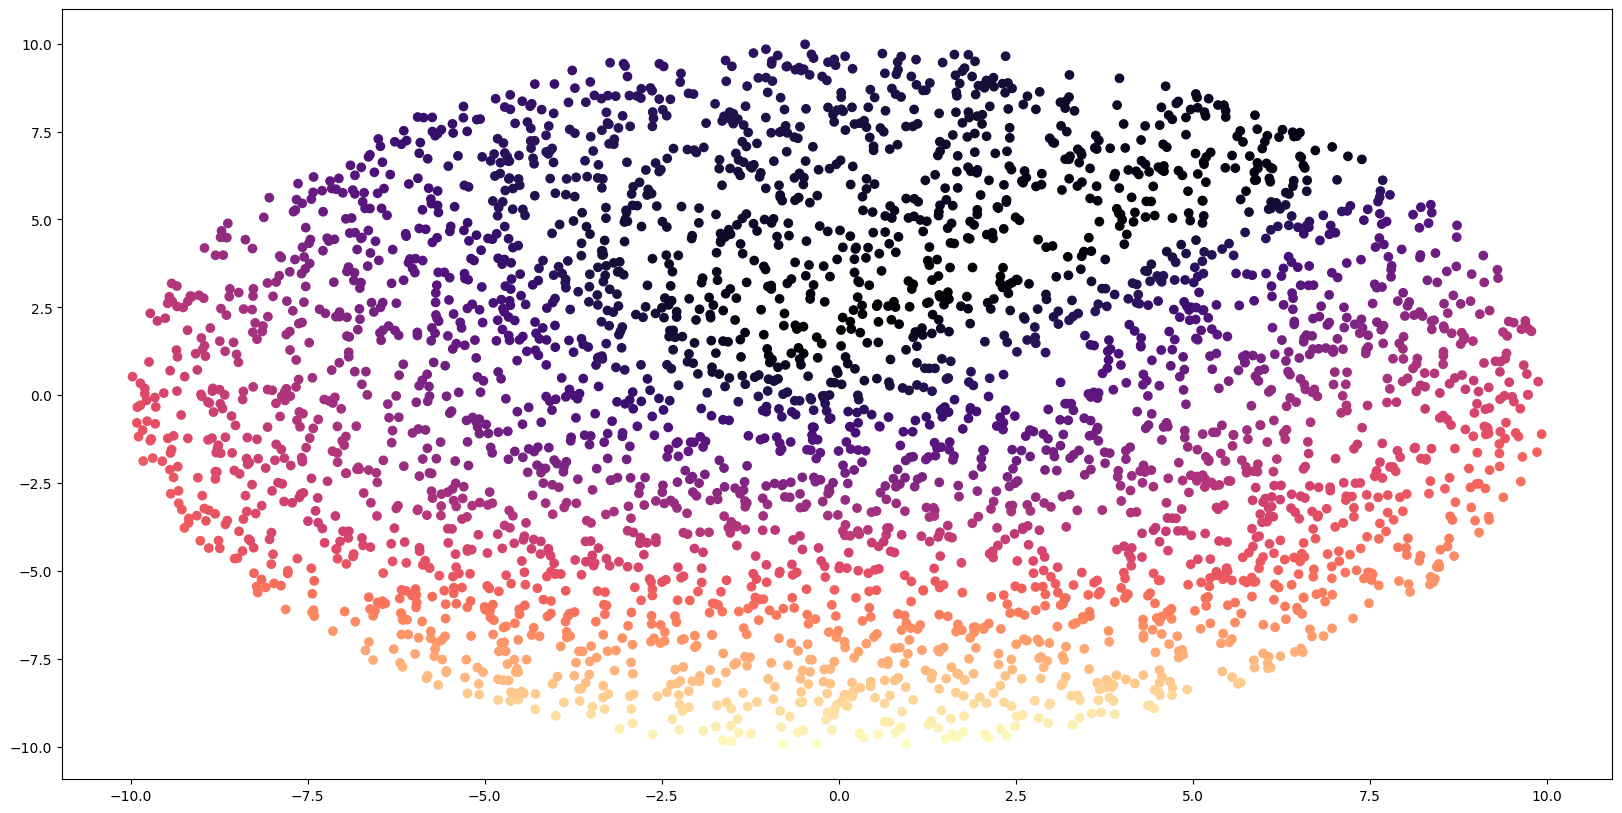

In [182]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=test_scores, cmap='magma')
plt.show() # какая-то фигня получилась

In [183]:
criterion = nn.BCELoss() 
accuracy = Accuracy(task='multiclass', num_classes=2)

optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [184]:
train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy = run_train()

EPOCH 0: train_loss: 0.7898196265811012
EPOCH 0: valid_loss: 0.7914273085502478
EPOCH 20: train_loss: 0.7882240573565166
EPOCH 20: valid_loss: 0.7897826868754166
EPOCH 40: train_loss: 0.7867327752567473
EPOCH 40: valid_loss: 0.7881662753912119
EPOCH 60: train_loss: 0.7850507492110843
EPOCH 60: valid_loss: 0.7865755558013916
EPOCH 80: train_loss: 0.7837146106220427
EPOCH 80: valid_loss: 0.7850111103974856


In [185]:
with torch.no_grad():
    test_scores = model(torch.tensor(X_test.to_numpy().astype(np.float32)))

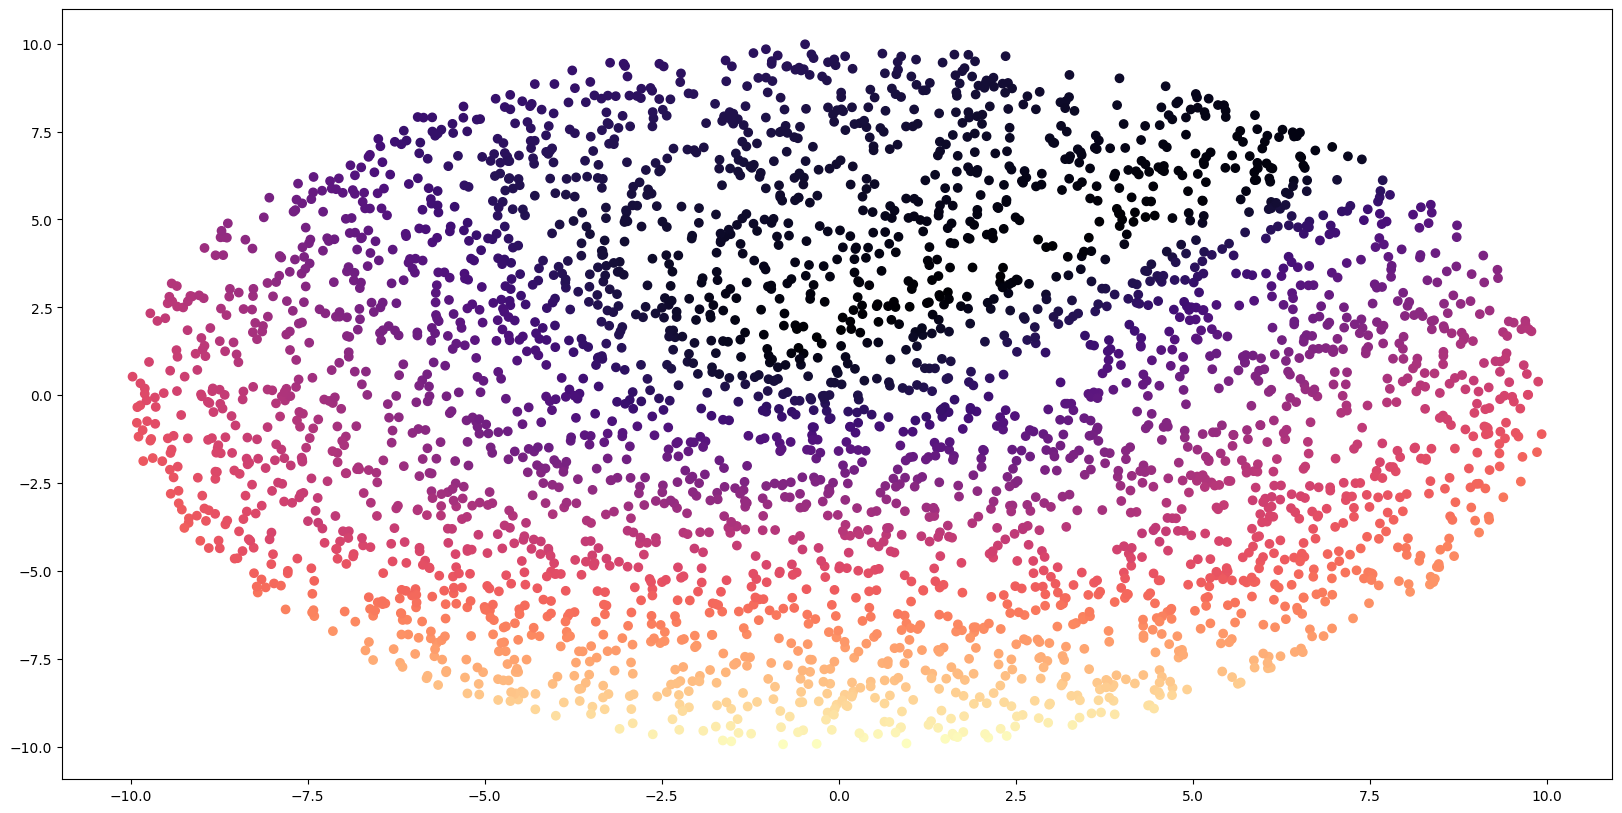

In [186]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=test_scores, cmap='magma')
plt.show() # какая-то фигня получилась 2

### решила заново начать

In [192]:
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size=0.33)

In [193]:
def create_data_loader(X_train, y_train, X_test, y_test):
    train_tensor = data_utils.TensorDataset(torch.tensor(X_train.astype(np.float32)), torch.tensor(y_train))
    train_loader = data_utils.DataLoader(dataset=train_tensor,
                                         batch_size=64,
                                         shuffle=True)

    test_tensor = data_utils.TensorDataset(torch.tensor(X_test.astype(np.float32)), torch.tensor(y_test))
    test_loader = data_utils.DataLoader(dataset=test_tensor,
                                        batch_size=64,
                                        shuffle=False)
    return train_loader, test_loader

train_loader, test_loader = create_data_loader(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()) 

In [194]:
INPUT_SIZE = 2
HIDDEN_SIZE = 5
OUTPUT_SIZE = 1
LEARNING_RATE = 1e-6
EPOCHS = 100

In [247]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE)
        self.l2 = nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)  
        return x # без сигмоиды потому что использую BCEWithLogitsLoss потом

In [248]:
model = Model()

In [249]:
print(model)

Model(
  (l1): Linear(in_features=2, out_features=5, bias=True)
  (l2): Linear(in_features=5, out_features=1, bias=True)
)


In [250]:
criterion = nn.BCEWithLogitsLoss() 
accuracy = Accuracy(task='multiclass', num_classes=2)

optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [ ]:
 #return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)

In [251]:
train_loss_values = []
train_accuracy_values = []
valid_loss_values = []
valid_accuracy = []

def run_train():
    step = 0
    for epoch in range(EPOCHS):
        running_loss = []
        running_acc = []
        for features, label in train_loader:
            # Reset gradients

            output = model(features)
            # Calculate error and backpropagate
            
            #label = label.squeeze(-1)
            #label = label.long().unsqueeze(1) # ValueError: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
            #label = label.float()  # RuntimeError: Found dtype Long but expected Float
            label = label.float().unsqueeze(1)
            loss = criterion(output, label)
            loss.backward()
            acc = accuracy(output, label).item()

            # Update weights with gradients
            optimizer.step()
            optimizer.zero_grad()

            running_loss.append(loss.item())
            running_acc.append(acc)

            step += 1

        train_loss_values.append(np.mean(running_loss))
        train_accuracy_values.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print(f'EPOCH {epoch}: train_loss: {train_loss_values[-1]}')# train_accuracy_values[-1]))


        # Run validation
        running_loss = []
        running_acc = []
        for features, label in test_loader:
            output = model(features)
            # Calculate error and backpropagate
            #label = label.squeeze(-1)
            #label = label.float().view(-1)
            #label = label.long().unsqueeze(1)
            #label = label.float()
            label = label.float().unsqueeze(1)
            loss = criterion(output, label)
            acc = accuracy(output, label).item()

            running_loss.append(loss.item())
            running_acc.append(acc)

        valid_loss_values.append(np.mean(running_loss))
        valid_accuracy.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print(f'EPOCH {epoch}: valid_loss: {valid_loss_values[-1]}') # valid_accuracy: {valid_accuracy[-1]}')

    return train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy

In [252]:
train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy = run_train()

EPOCH 0: train_loss: 0.7132197851226443
EPOCH 0: valid_loss: 0.7106888815760612
EPOCH 20: train_loss: 0.7113607293083555
EPOCH 20: valid_loss: 0.709091591147276
EPOCH 40: train_loss: 0.7101502810205732
EPOCH 40: valid_loss: 0.7075501072865266
EPOCH 60: train_loss: 0.7084860080764407
EPOCH 60: valid_loss: 0.7060516018133897
EPOCH 80: train_loss: 0.7071028834297544
EPOCH 80: valid_loss: 0.7046010230596249


In [253]:
with torch.no_grad():
    test_scores = model(torch.tensor(X_test.to_numpy().astype(np.float32)))

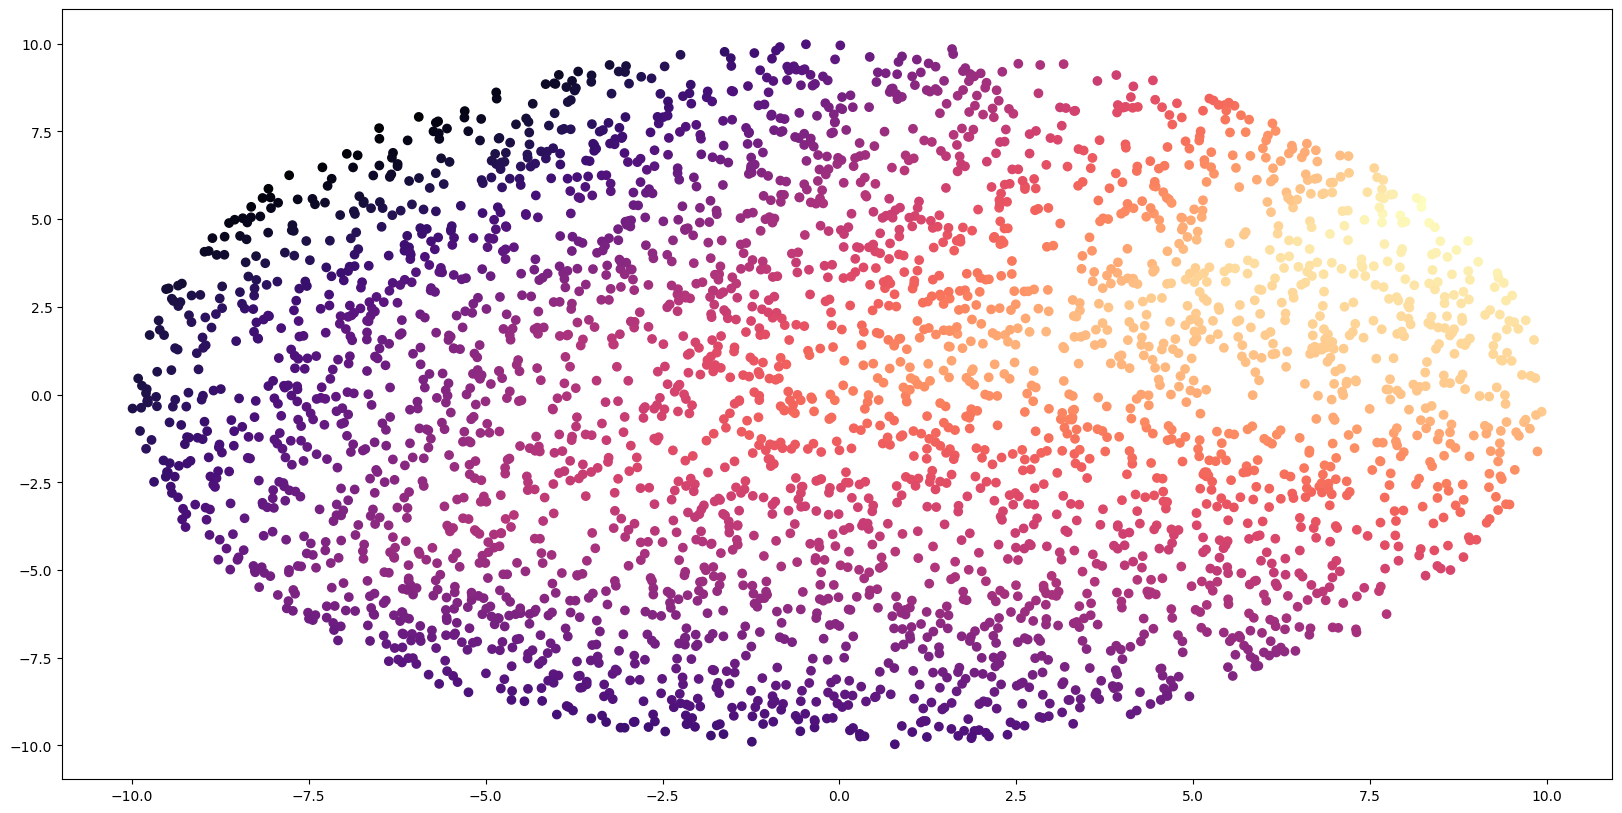

In [254]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=test_scores, cmap='magma')
plt.show() # какая-то фигня получилась 3

In [255]:
criterion = nn.BCEWithLogitsLoss() 
accuracy = Accuracy(task='multiclass', num_classes=2)

optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [256]:
train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy = run_train()

EPOCH 0: train_loss: 0.7057839978308905
EPOCH 0: valid_loss: 0.7032489386888651
EPOCH 20: train_loss: 0.7054407835006714
EPOCH 20: valid_loss: 0.7030320230584878
EPOCH 40: train_loss: 0.7051316335087731
EPOCH 40: valid_loss: 0.7028170228004456
EPOCH 60: train_loss: 0.7051491635186332
EPOCH 60: valid_loss: 0.7026036588045267
EPOCH 80: train_loss: 0.7046630393891108
EPOCH 80: valid_loss: 0.7023918949640714


In [258]:
EPOCHS = 500

In [262]:
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [263]:
train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy = run_train()

EPOCH 0: train_loss: 0.704740842183431
EPOCH 0: valid_loss: 0.702123761177063
EPOCH 20: train_loss: 0.7033006724857148
EPOCH 20: valid_loss: 0.7007843760343698
EPOCH 40: train_loss: 0.701940249261402
EPOCH 40: valid_loss: 0.6994902732280585
EPOCH 60: train_loss: 0.700645637512207
EPOCH 60: valid_loss: 0.6982323802434481
EPOCH 80: train_loss: 0.6995659987131755
EPOCH 80: valid_loss: 0.697013354072204
EPOCH 100: train_loss: 0.6983499294235593
EPOCH 100: valid_loss: 0.6958333414334518
EPOCH 120: train_loss: 0.6968787516866412
EPOCH 120: valid_loss: 0.6946923732757568
EPOCH 140: train_loss: 0.6958064442589169
EPOCH 140: valid_loss: 0.6935908828790371
EPOCH 160: train_loss: 0.6945545849345979
EPOCH 160: valid_loss: 0.6925231722685007
EPOCH 180: train_loss: 0.6936818866502671
EPOCH 180: valid_loss: 0.6914862451645044
EPOCH 200: train_loss: 0.6926828935032799
EPOCH 200: valid_loss: 0.6904842119950515
EPOCH 220: train_loss: 0.6915620417821975
EPOCH 220: valid_loss: 0.6895124981036553
EPOCH 240

In [264]:
with torch.no_grad():
    test_scores = model(torch.tensor(X_test.to_numpy().astype(np.float32)))

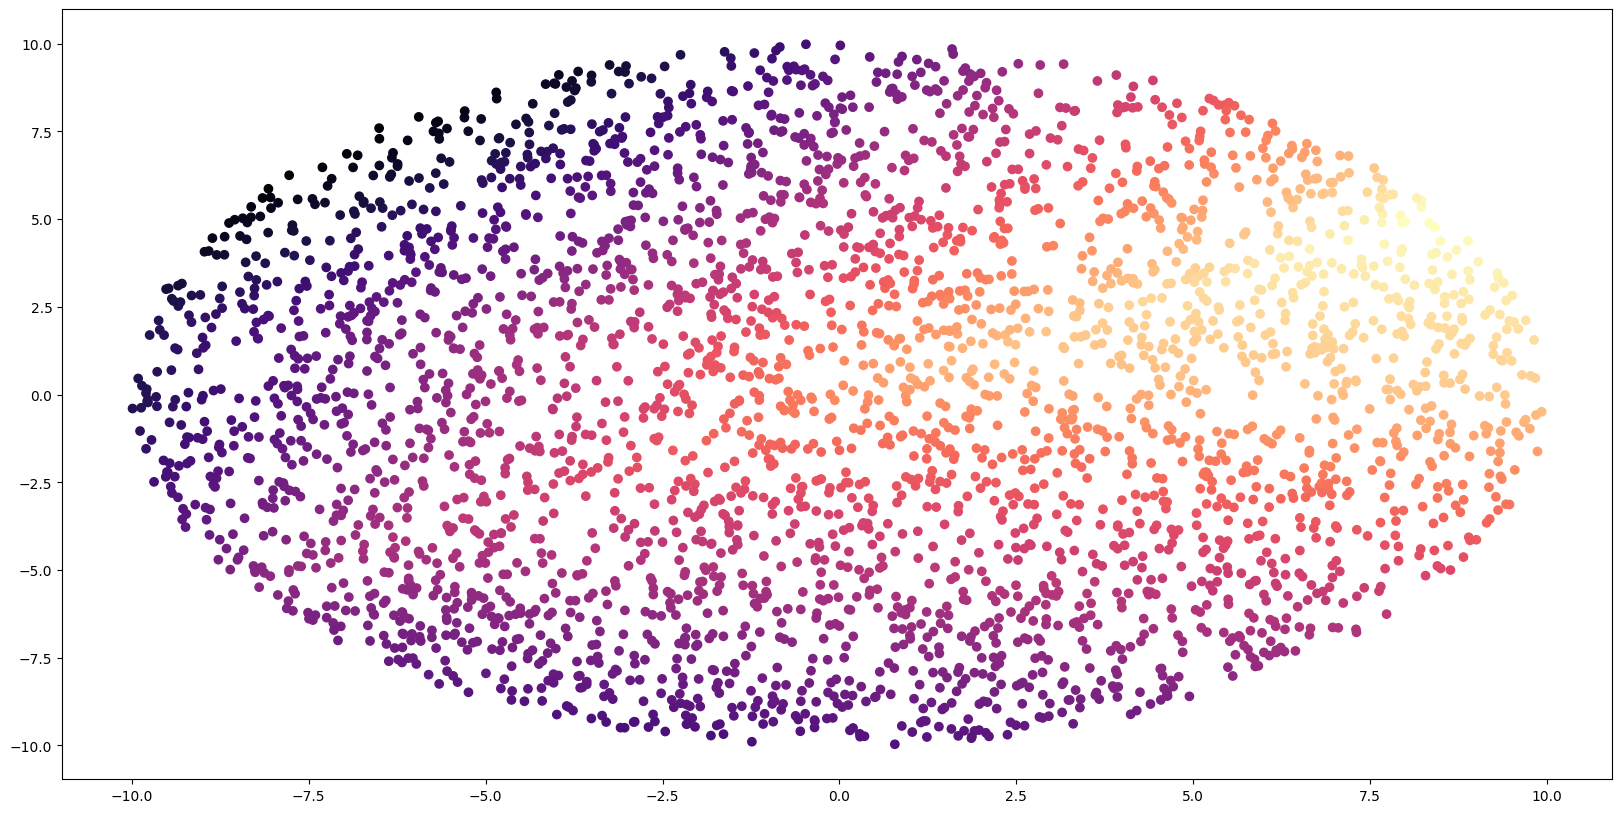

In [265]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=test_scores, cmap='magma')
plt.show() # какая-то фигня получилась 4

### финальный вариант!

In [266]:
model = mymodel()

In [267]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
  (3): Sigmoid()
)


In [282]:
criterion = nn.BCELoss() 
accuracy = Accuracy(task='multiclass', num_classes=2)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2) # наконец решила поменять learning rate

In [283]:
EPOCHS = 100

In [284]:
train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy = run_train()

EPOCH 0: train_loss: 0.3695290886220478
EPOCH 0: valid_loss: 0.357252951997977
EPOCH 20: train_loss: 0.36941251485120685
EPOCH 20: valid_loss: 0.3570107568341952
EPOCH 40: train_loss: 0.3687685547840028
EPOCH 40: valid_loss: 0.3571742351811666
EPOCH 60: train_loss: 0.3688361170746031
EPOCH 60: valid_loss: 0.3571547828614712
EPOCH 80: train_loss: 0.3691157861834481
EPOCH 80: valid_loss: 0.35707310472543424


In [285]:
with torch.no_grad():
    test_scores = model(torch.tensor(X_test.to_numpy().astype(np.float32)))

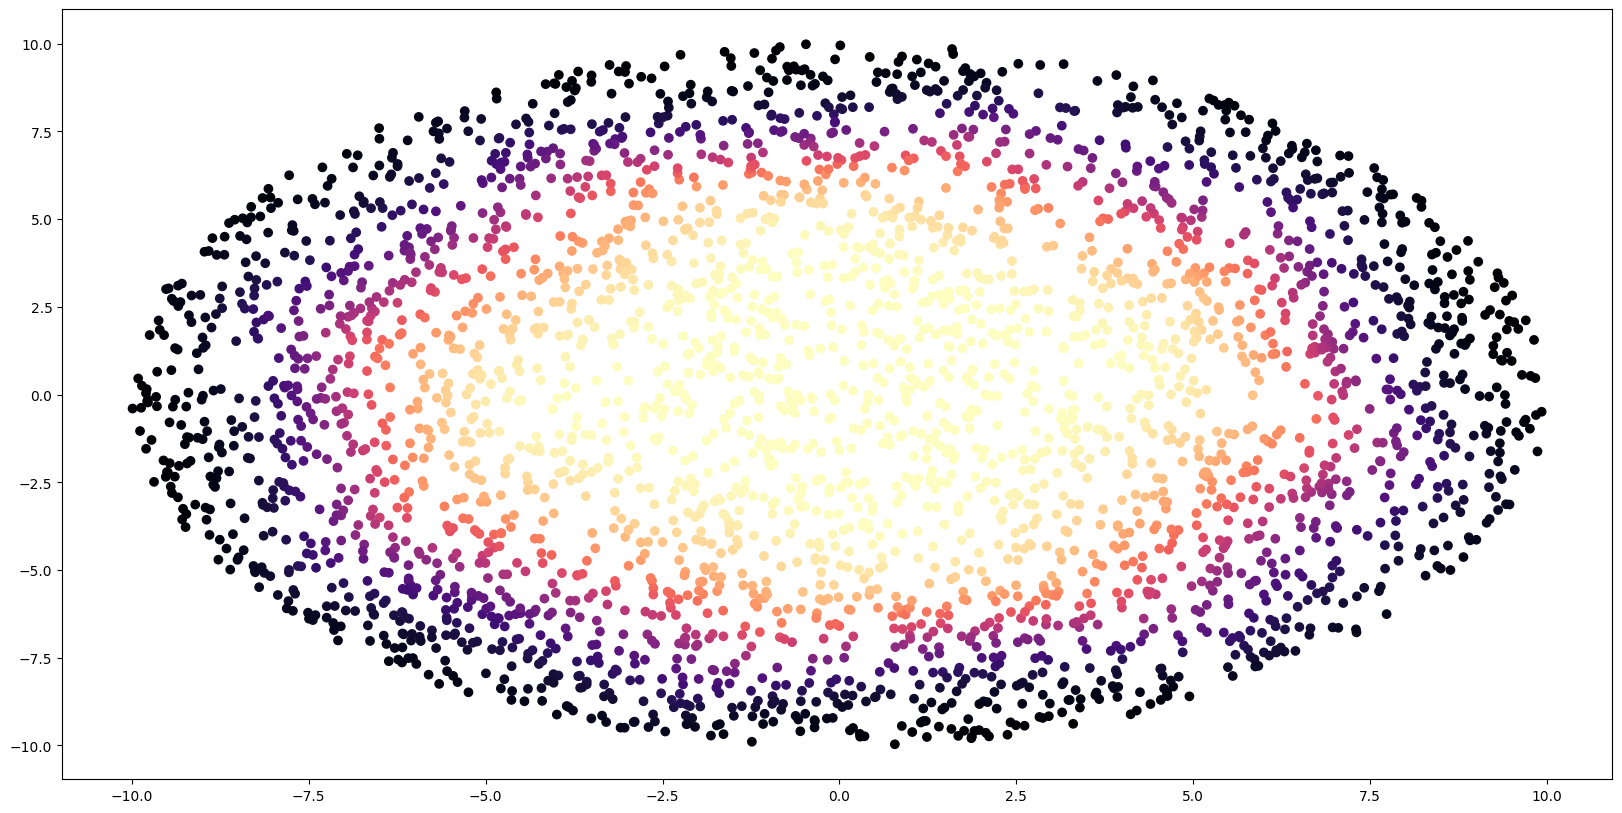

In [286]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=test_scores, cmap='magma')
plt.show() # стало лучше, когда я изменила learning rate и оптимизатор